In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format

In [31]:
# prettify, using microsofts colors
MIC_OR = '#F25022'
MIC_GR = '#7FBA00'
MIC_BL = '#00A4EF'
MIC_YL = '#FFB900'
MIC_GY = '#737373'

microsoft_color_list = [MIC_OR, MIC_GR, MIC_BL, MIC_YL, MIC_GY]

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=microsoft_color_list)
style.context('dark_background')

In [71]:

def VisualizeMeSenpai(filter_, num_of_movies):
    df = pd.read_csv('../data/all_data.csv', index_col=0)

    col_dict = {'movie_id': 'Id', 
                'primary_title': 'MovieTitle',
                'persons_name': 'PersonName',
                'persons_job': 'PersonJob',
                'new_budget_api': 'Budget', 
                'new_ww_revenue_api': 'Revenue'}

    relevant_col = list(col_dict.keys())

    people_df = df[relevant_col].drop_duplicates()
    people_df.rename(columns=col_dict, inplace=True)

    job_filter = people_df['PersonJob'] == filter_

    job_df = people_df[job_filter]
    job_count_df = job_df.groupby('PersonName').count().reset_index()

    prolific_filter = job_count_df['Id'] >= num_of_movies

    prolific_df = job_count_df[prolific_filter]
    prolific_df.sort_values('Id', ascending=False).head()

    job_usefulness_df = job_df.groupby('PersonName').mean().reset_index()
    job_usefulness_df.sort_values('Revenue', ascending=False).head(30)

    prolific_list = list(prolific_df.PersonName)
    plot_df = job_usefulness_df.loc[job_usefulness_df.PersonName.isin(prolific_list)]
    plot_df = plot_df.nlargest(10,'Revenue')
    
    
    ax = sns.barplot(data=plot_df, y='PersonName', x='Revenue', orient='h', color='#7FBA00');
    ax.set(xlabel='Revenue', ylabel=filter_.title(), title=f'Average Revenue Per Movie, by {filter_.title()}')


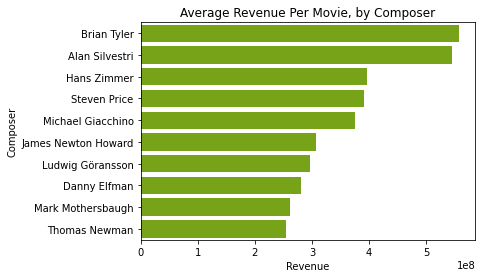

In [72]:
VisualizeMeSenpai('composer', 4)

In [5]:
composer_usefulness_df = composer_df.groupby('PersonName').mean().reset_index()
composer_usefulness_df.sort_values('Revenue', ascending=False).head(30)

,PersonName,Budget,Revenue
194,Kristen Anderson-Lopez,"150,000,000.00","1,274,219,009.00"
273,Randy Newman,"200,000,000.00","905,264,655.00"
150,Joby Talbot,"75,000,000.00","634,151,679.00"
124,Heitor Pereira,"42,500,000.00","617,502,902.50"
40,Brian Tyler,"105,333,333.33","557,795,444.50"
7,Alan Silvestri,"107,250,000.00","544,995,704.25"
318,Tiësto,"80,000,000.00","528,600,000.00"
305,Steve Mazzaro,"125,000,000.00","498,814,908.00"
160,John Ottman,"51,000,000.00","478,407,880.50"
162,John Powell,"131,000,000.00","441,763,634.50"


In [14]:
prolific_list = list(prolific_df.PersonName)
plot_df = composer_usefulness_df.loc[composer_usefulness_df.PersonName.isin(prolific_list)]
plot_df = plot_df.nlargest(10,'Revenue')

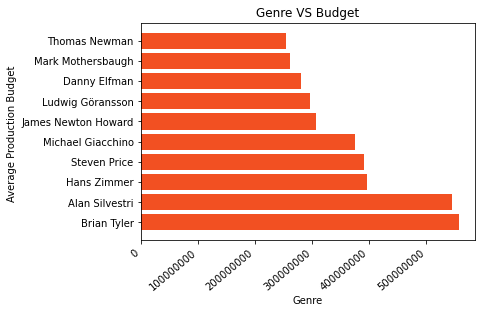

In [15]:
fig,ax = plt.subplots()

plt.xticks(rotation=40, ha="right")
ax.ticklabel_format(style='plain')

x = plot_df.PersonName
height = plot_df.Revenue
ax.barh(y = x , width = height)

ax.set_xlabel('Genre')
ax.set_ylabel('Average Production Budget ')
ax.set_title('Genre VS Budget');

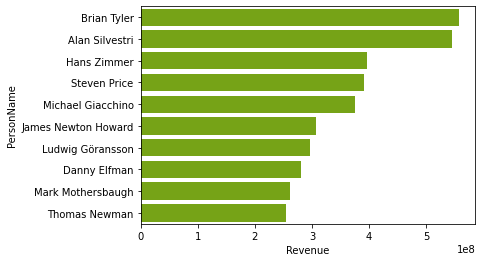

In [16]:
sns.barplot(data=plot_df, y='PersonName', x='Revenue', orient='h', color='#7FBA00');

In [4]:

col_dict = {'movie_id': 'Id', 
            'primary_title': 'MovieTitle',
            'persons_name': 'PersonName',
            'persons_job': 'PersonJob',
            'new_budget_api': 'Budget', 
            'new_ww_revenue_api': 'Revenue'}

relevant_col = list(col_dict.keys())

people_df = df[relevant_col].drop_duplicates()
people_df.rename(columns=col_dict, inplace=True)

composer_filter = people_df['PersonJob'] == 'composer'

composer_df = people_df[composer_filter]
composer_count_df = composer_df.groupby('PersonName').count().reset_index()

prolific_filter = composer_count_df['Id'] >= 4

prolific_df = composer_count_df[prolific_filter]
prolific_df.sort_values('Id', ascending=False).head()


,PersonName,Id,MovieTitle,PersonJob,Budget,Revenue
211,Marco Beltrami,16,16,16,16,16
224,Michael Andrews,12,12,12,12,12
50,Christophe Beck,12,12,12,12,12
15,Alexandre Desplat,11,11,11,11,11
132,James Newton Howard,11,11,11,11,11
